In [23]:
import numpy as np
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# Load the Excel file into a Pandas DataFrame
df = pd.read_csv('edits of prepared data/2nd_setup_17_peaks_20k.csv')

In [25]:
df

,test_id,gas,oil,water,Peak 1,Peak 2,Peak 3,Peak 4,Peak 5,Peak 6,...,Peak 59,Peak 60,Peak 61,Peak 62,Peak 63,Peak 64,Peak 65,Peak 66,Peak 67,Peak 68
0,GOW_00,0.059070,0.552676,0.026829,443.486864,886.937391,0.016516,2273.715400,1227.200431,3410.769645,...,1227.200431,11407.522530,6913.796264,9157.996964,15212.969950,6266.841299,12045.201920,8743.364147,13023.091500,10150.807400
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GOW_01c,5.566442,8.711272,20.017094,7.039264,2272.232233,456.680116,1340.195322,8750.109421,6250.077214,...,5062.912392,1340.195322,15841.865950,8442.069762,7220.613714,17675.404360,10320.935620,16437.550890,15116.679690,10926.236370
3,GOW_01,2.182627,8.709136,20.019243,0.006607,451.358552,2456.072315,1337.935887,4956.104522,11250.141630,...,451.358552,4333.613561,7979.050674,3574.208743,8750.109421,15840.620620,6891.588393,14823.825150,6035.150076,9799.148087
4,GOW_02,2.544509,11.528075,26.634452,450.202408,6.936863,2277.629773,1350.749264,3416.438053,11250.141630,...,15956.423290,5145.504004,11011.143570,4539.166024,8908.643166,3750.048310,13710.134920,15148.582650,16387.407280,19379.979880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,W_501,0.036427,0.000000,49.999870,446.205453,11.128710,892.410907,2537.573849,3458.062534,4786.960680,...,3610.547996,15995.088040,5698.348861,3078.834145,2085.012908,6257.542600,7980.715521,15067.728560,10194.251980,4962.526075
224,W_502C3,0.000000,0.000000,59.995398,545.719708,164.836381,4888.129871,1132.631169,3467.694864,3847.570694,...,5704.156007,2746.746694,3701.041025,14825.110120,2330.449030,5126.979277,6892.787479,10878.342290,8892.850241,6162.372143
225,W_502C6,0.000000,0.000000,59.998810,539.750702,168.694598,1133.906230,5030.550275,3734.404033,1709.847538,...,4254.189783,2749.772487,3431.071531,2340.841111,6906.482829,3842.192974,6251.012039,5195.561729,10907.539870,7445.549755
226,W_502,0.000000,0.000000,60.001667,445.792545,16.727750,891.581786,2710.608941,5716.427648,5199.393520,...,3610.914658,2813.806339,5185.308385,6259.478315,15997.872700,19222.030820,10136.375420,16526.194090,8044.141571,14580.334650


In [26]:
df = df.drop(columns=['test_id'])

In [27]:
df

,gas,oil,water,Peak 1,Peak 2,Peak 3,Peak 4,Peak 5,Peak 6,Peak 7,...,Peak 59,Peak 60,Peak 61,Peak 62,Peak 63,Peak 64,Peak 65,Peak 66,Peak 67,Peak 68
0,0.059070,0.552676,0.026829,443.486864,886.937391,0.016516,2273.715400,1227.200431,3410.769645,5684.557717,...,1227.200431,11407.522530,6913.796264,9157.996964,15212.969950,6266.841299,12045.201920,8743.364147,13023.091500,10150.807400
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.566442,8.711272,20.017094,7.039264,2272.232233,456.680116,1340.195322,8750.109421,6250.077214,3408.242645,...,5062.912392,1340.195322,15841.865950,8442.069762,7220.613714,17675.404360,10320.935620,16437.550890,15116.679690,10926.236370
3,2.182627,8.709136,20.019243,0.006607,451.358552,2456.072315,1337.935887,4956.104522,11250.141630,8750.109421,...,451.358552,4333.613561,7979.050674,3574.208743,8750.109421,15840.620620,6891.588393,14823.825150,6035.150076,9799.148087
4,2.544509,11.528075,26.634452,450.202408,6.936863,2277.629773,1350.749264,3416.438053,11250.141630,8750.109421,...,15956.423290,5145.504004,11011.143570,4539.166024,8908.643166,3750.048310,13710.134920,15148.582650,16387.407280,19379.979880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,0.036427,0.000000,49.999870,446.205453,11.128710,892.410907,2537.573849,3458.062534,4786.960680,8750.112724,...,3610.547996,15995.088040,5698.348861,3078.834145,2085.012908,6257.542600,7980.715521,15067.728560,10194.251980,4962.526075
224,0.000000,0.000000,59.995398,545.719708,164.836381,4888.129871,1132.631169,3467.694864,3847.570694,1551.878651,...,5704.156007,2746.746694,3701.041025,14825.110120,2330.449030,5126.979277,6892.787479,10878.342290,8892.850241,6162.372143
225,0.000000,0.000000,59.998810,539.750702,168.694598,1133.906230,5030.550275,3734.404033,1709.847538,3369.762875,...,4254.189783,2749.772487,3431.071531,2340.841111,6906.482829,3842.192974,6251.012039,5195.561729,10907.539870,7445.549755
226,0.000000,0.000000,60.001667,445.792545,16.727750,891.581786,2710.608941,5716.427648,5199.393520,4813.542078,...,3610.914658,2813.806339,5185.308385,6259.478315,15997.872700,19222.030820,10136.375420,16526.194090,8044.141571,14580.334650


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 71 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gas      217 non-null    float64
 1   oil      217 non-null    float64
 2   water    217 non-null    float64
 3   Peak 1   217 non-null    float64
 4   Peak 2   217 non-null    float64
 5   Peak 3   217 non-null    float64
 6   Peak 4   217 non-null    float64
 7   Peak 5   217 non-null    float64
 8   Peak 6   217 non-null    float64
 9   Peak 7   217 non-null    float64
 10  Peak 8   217 non-null    float64
 11  Peak 9   217 non-null    float64
 12  Peak 10  217 non-null    float64
 13  Peak 11  217 non-null    float64
 14  Peak 12  217 non-null    float64
 15  Peak 13  217 non-null    float64
 16  Peak 14  217 non-null    float64
 17  Peak 15  217 non-null    float64
 18  Peak 16  217 non-null    float64
 19  Peak 17  217 non-null    float64
 20  Peak 18  217 non-null    float64
 21  Peak 19  217 non

In [30]:
df

,gas,oil,water,Peak 1,Peak 2,Peak 3,Peak 4,Peak 5,Peak 6,Peak 7,...,Peak 59,Peak 60,Peak 61,Peak 62,Peak 63,Peak 64,Peak 65,Peak 66,Peak 67,Peak 68
0,0.059070,0.552676,0.026829,443.486864,886.937391,0.016516,2273.715400,1227.200431,3410.769645,5684.557717,...,1227.200431,11407.522530,6913.796264,9157.996964,15212.969950,6266.841299,12045.201920,8743.364147,13023.091500,10150.807400
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.566442,8.711272,20.017094,7.039264,2272.232233,456.680116,1340.195322,8750.109421,6250.077214,3408.242645,...,5062.912392,1340.195322,15841.865950,8442.069762,7220.613714,17675.404360,10320.935620,16437.550890,15116.679690,10926.236370
3,2.182627,8.709136,20.019243,0.006607,451.358552,2456.072315,1337.935887,4956.104522,11250.141630,8750.109421,...,451.358552,4333.613561,7979.050674,3574.208743,8750.109421,15840.620620,6891.588393,14823.825150,6035.150076,9799.148087
4,2.544509,11.528075,26.634452,450.202408,6.936863,2277.629773,1350.749264,3416.438053,11250.141630,8750.109421,...,15956.423290,5145.504004,11011.143570,4539.166024,8908.643166,3750.048310,13710.134920,15148.582650,16387.407280,19379.979880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,0.036427,0.000000,49.999870,446.205453,11.128710,892.410907,2537.573849,3458.062534,4786.960680,8750.112724,...,3610.547996,15995.088040,5698.348861,3078.834145,2085.012908,6257.542600,7980.715521,15067.728560,10194.251980,4962.526075
224,0.000000,0.000000,59.995398,545.719708,164.836381,4888.129871,1132.631169,3467.694864,3847.570694,1551.878651,...,5704.156007,2746.746694,3701.041025,14825.110120,2330.449030,5126.979277,6892.787479,10878.342290,8892.850241,6162.372143
225,0.000000,0.000000,59.998810,539.750702,168.694598,1133.906230,5030.550275,3734.404033,1709.847538,3369.762875,...,4254.189783,2749.772487,3431.071531,2340.841111,6906.482829,3842.192974,6251.012039,5195.561729,10907.539870,7445.549755
226,0.000000,0.000000,60.001667,445.792545,16.727750,891.581786,2710.608941,5716.427648,5199.393520,4813.542078,...,3610.914658,2813.806339,5185.308385,6259.478315,15997.872700,19222.030820,10136.375420,16526.194090,8044.141571,14580.334650


In [31]:
df.isna().sum()

gas        11
oil        11
water      11
Peak 1     11
Peak 2     11
           ..
Peak 64    11
Peak 65    11
Peak 66    11
Peak 67    11
Peak 68    11
Length: 71, dtype: int64

In [32]:
df.dropna(axis=0, inplace=True)

In [33]:
df

,gas,oil,water,Peak 1,Peak 2,Peak 3,Peak 4,Peak 5,Peak 6,Peak 7,...,Peak 59,Peak 60,Peak 61,Peak 62,Peak 63,Peak 64,Peak 65,Peak 66,Peak 67,Peak 68
0,0.059070,0.552676,0.026829,443.486864,886.937391,0.016516,2273.715400,1227.200431,3410.769645,5684.557717,...,1227.200431,11407.522530,6913.796264,9157.996964,15212.969950,6266.841299,12045.201920,8743.364147,13023.091500,10150.807400
2,5.566442,8.711272,20.017094,7.039264,2272.232233,456.680116,1340.195322,8750.109421,6250.077214,3408.242645,...,5062.912392,1340.195322,15841.865950,8442.069762,7220.613714,17675.404360,10320.935620,16437.550890,15116.679690,10926.236370
3,2.182627,8.709136,20.019243,0.006607,451.358552,2456.072315,1337.935887,4956.104522,11250.141630,8750.109421,...,451.358552,4333.613561,7979.050674,3574.208743,8750.109421,15840.620620,6891.588393,14823.825150,6035.150076,9799.148087
4,2.544509,11.528075,26.634452,450.202408,6.936863,2277.629773,1350.749264,3416.438053,11250.141630,8750.109421,...,15956.423290,5145.504004,11011.143570,4539.166024,8908.643166,3750.048310,13710.134920,15148.582650,16387.407280,19379.979880
5,3.291336,14.250283,33.346524,449.819229,6.926953,2275.304272,1340.208535,4954.964895,3412.972925,6250.077214,...,4954.964895,15922.221250,10291.549740,4539.341097,13837.459390,11064.161030,6250.077214,15208.487420,19344.007290,13398.798600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,0.036427,0.000000,49.999870,446.205453,11.128710,892.410907,2537.573849,3458.062534,4786.960680,8750.112724,...,3610.547996,15995.088040,5698.348861,3078.834145,2085.012908,6257.542600,7980.715521,15067.728560,10194.251980,4962.526075
224,0.000000,0.000000,59.995398,545.719708,164.836381,4888.129871,1132.631169,3467.694864,3847.570694,1551.878651,...,5704.156007,2746.746694,3701.041025,14825.110120,2330.449030,5126.979277,6892.787479,10878.342290,8892.850241,6162.372143
225,0.000000,0.000000,59.998810,539.750702,168.694598,1133.906230,5030.550275,3734.404033,1709.847538,3369.762875,...,4254.189783,2749.772487,3431.071531,2340.841111,6906.482829,3842.192974,6251.012039,5195.561729,10907.539870,7445.549755
226,0.000000,0.000000,60.001667,445.792545,16.727750,891.581786,2710.608941,5716.427648,5199.393520,4813.542078,...,3610.914658,2813.806339,5185.308385,6259.478315,15997.872700,19222.030820,10136.375420,16526.194090,8044.141571,14580.334650


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5,
        44.5, 45.5, 46.5, 47.5, 48.5, 49.5, 50.5, 51.5, 52.5, 53.5, 54.5,
        55.5, 56.5, 57.5, 58.5, 59.5, 60.5, 61.5, 62.5, 63.5, 64.5, 65.5,
        66.5, 67.5, 68.5, 69.5, 70.5]),
 [Text(0.5, 0, 'gas'),
  Text(1.5, 0, 'oil'),
  Text(2.5, 0, 'water'),
  Text(3.5, 0, 'Peak 1'),
  Text(4.5, 0, 'Peak 2'),
  Text(5.5, 0, 'Peak 3'),
  Text(6.5, 0, 'Peak 4'),
  Text(7.5, 0, 'Peak 5'),
  Text(8.5, 0, 'Peak 6'),
  Text(9.5, 0, 'Peak 7'),
  Text(10.5, 0, 'Peak 8'),
  Text(11.5, 0, 'Peak 9'),
  Text(12.5, 0, 'Peak 10'),
  Text(13.5, 0, 'Peak 11'),
  Text(14.5, 0, 'Peak 12'),
  Text(15.5, 0, 'Peak 13'),
  Text(16.5, 0, 'Peak 14'),
  Text(17.5, 0, 'Peak 15'),
  Text(18.5, 0, 'Peak 16'),
  Text(19.5, 

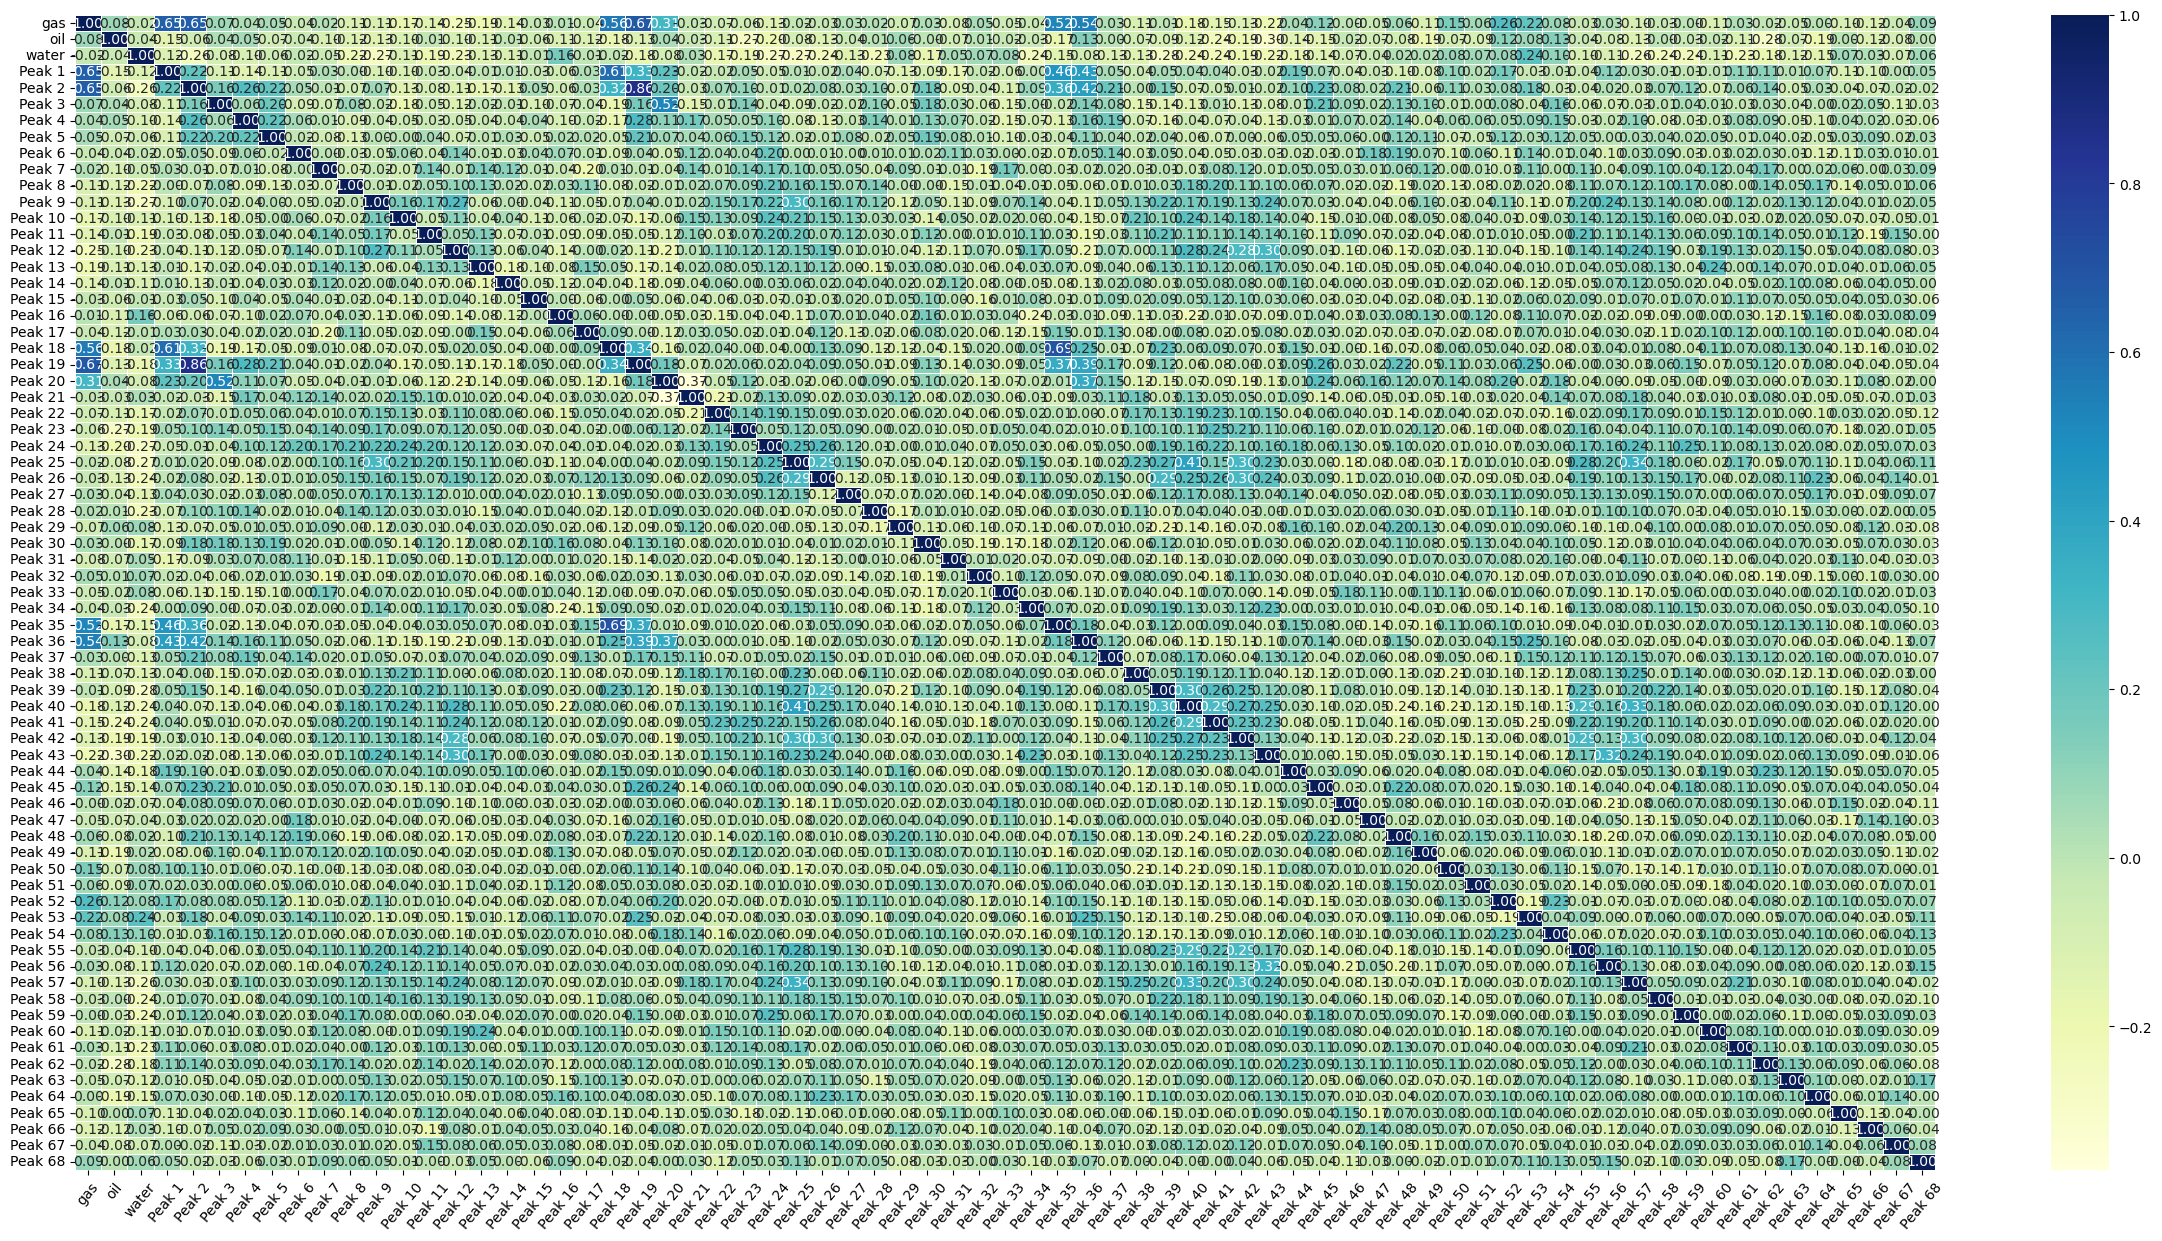

In [34]:
# Correlation matrix
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(30, 15))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu");
plt.xticks(rotation = 50)

In [38]:
df.columns

Index(['gas', 'oil', 'water', 'Peak 1', 'Peak 2', 'Peak 3', 'Peak 4', 'Peak 5',
       'Peak 6', 'Peak 7', 'Peak 8', 'Peak 9', 'Peak 10', 'Peak 11', 'Peak 12',
       'Peak 13', 'Peak 14', 'Peak 15', 'Peak 16', 'Peak 17', 'Peak 18',
       'Peak 19', 'Peak 20', 'Peak 21', 'Peak 22', 'Peak 23', 'Peak 24',
       'Peak 25', 'Peak 26', 'Peak 27', 'Peak 28', 'Peak 29', 'Peak 30',
       'Peak 31', 'Peak 32', 'Peak 33', 'Peak 34', 'Peak 35', 'Peak 36',
       'Peak 37', 'Peak 38', 'Peak 39', 'Peak 40', 'Peak 41', 'Peak 42',
       'Peak 43', 'Peak 44', 'Peak 45', 'Peak 46', 'Peak 47', 'Peak 48',
       'Peak 49', 'Peak 50', 'Peak 51', 'Peak 52', 'Peak 53', 'Peak 54',
       'Peak 55', 'Peak 56', 'Peak 57', 'Peak 58', 'Peak 59', 'Peak 60',
       'Peak 61', 'Peak 62', 'Peak 63', 'Peak 64', 'Peak 65', 'Peak 66',
       'Peak 67', 'Peak 68'],
      dtype='object')

In [39]:
# Split the data into train, validation and test
train, test = train_test_split(df, test_size=0.2, random_state = 1)
train, val = train_test_split(train, test_size=0.1, random_state = 1)

In [40]:
# Helper functions
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

def format_output(data):
    y1 = data.pop('gas')
    y1 = np.array(y1)
    y2 = data.pop('oil')
    y2 = np.array(y2)
    y3 = data.pop('water')
    y3 = np.array(y3)
    return y1, y2, y3

In [41]:
# Get Gas, Oil and Water as the outputs and format them as np arrays
train_stats = train.describe()
train_stats.pop('gas')
train_stats.pop('oil')
train_stats.pop('water')
train_stats = train_stats.transpose()
train_Y = format_output(train)
test_Y = format_output(test)
val_Y = format_output(val)

print(train_stats)

         count          mean          std         min          25%  \
Peak 1   155.0    311.114426  1216.333909    0.006607     6.936863   
Peak 2   155.0   1391.412750  1397.341003    0.009910   455.964959   
Peak 3   155.0   1753.515719  2164.570369    0.009910   379.401811   
Peak 4   155.0   3402.783877  2487.859700  462.850621  1347.685483   
Peak 5   155.0   4750.352435  2914.832674    7.141666  3410.946370   
...        ...           ...          ...         ...          ...   
Peak 64  155.0  10056.876011  5595.139781  448.653175  5518.081264   
Peak 65  155.0  11125.729896  5292.567550  336.490707  6691.943825   
Peak 66  155.0  10533.889213  5580.746980  426.947400  5959.663793   
Peak 67  155.0  11015.552799  5885.196510  456.121864  5934.968561   
Peak 68  155.0  10417.772690  5750.915516  755.906656  5891.500856   

                  50%           75%          max  
Peak 1       7.039264    449.465779  13592.90524  
Peak 2     904.180451   2457.185516  13504.86984  
Peak 3

In [42]:
# Normalize the training and test data
norm_train_X = np.array(norm(train))
norm_test_X = np.array(norm(test))
norm_val_X = np.array(norm(val))

In [54]:
L = 4 # distance between accelerometers in the rig in meters
d = 0.0762 # inner diameter of rig in meters
g = 9.8 # gravitional acceleration in m^-2

# Define loss function using the Darcy-Weisbach equation
def custom_loss(y_true, y_pred):
    # Calculate the head loss using the Darcy-Weisbach equation
    v = tf.abs(y_true - y_pred)
    head_loss = ((L/d) * (v**2 / (2*g)))
      
    # Check for NaN values and set them to 0
    head_loss = tf.where(tf.math.is_nan(head_loss), tf.zeros_like(head_loss), head_loss)
    
    # Return the mean squared error of the head loss
    return tf.keras.backend.mean(tf.keras.backend.square(head_loss))


In [55]:
def build_model():
    # Define model layers.
    input_layer = Input(shape=(len(train.columns),))
    first_dense = Dense(units='128', activation='relu')(input_layer)

    second_dense_1 = Dense(units='128', activation='relu')(first_dense)
    third_dense_1 = Dense(units='128', activation='relu')(second_dense_1)
    fourth_dense_1 = Dense(units='128', activation='relu')(third_dense_1)
    fifth_dense_1 = Dense(units='128', activation='relu')(fourth_dense_1)
    # Y1 output will be fed from the fifth dense 1
    y1_output = Dense(units='1', name='gas_output')(fifth_dense_1)

    second_dense_2 = Dense(units='128', activation='relu')(first_dense)
    third_dense_2 = Dense(units='128', activation='relu')(second_dense_2)
    fourth_dense_2 = Dense(units='128', activation='relu')(third_dense_2)
    # Y2 output will be fed from the fourth dense 2
    y2_output = Dense(units='1', name='oil_output')(fourth_dense_2)

    second_dense_3 = Dense(units='128', activation='relu')(first_dense)
    third_dense_3 = Dense(units='128', activation='relu')(second_dense_3)
    fourth_dense_3 = Dense(units='128', activation='relu')(third_dense_3)
    # Y3 output will be fed from the fourth dense 3
    y3_output = Dense(units='1', name='water_output')(fourth_dense_3)

    # Define the model with the input layer and a list of output layers
    model = Model(inputs=input_layer, outputs=[y1_output, y2_output, y3_output])

    return model

In [115]:
model = build_model()
# Specifying the optimizer, and compiling the model with custom loss functions for all 3 outputs
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00015)
model.compile(optimizer=optimizer,
              loss={'gas_output': custom_loss, 'oil_output': custom_loss, 'water_output': custom_loss},
              metrics={'gas_output': tf.keras.metrics.RootMeanSquaredError(),
                       'oil_output': tf.keras.metrics.RootMeanSquaredError(),
                       'water_output': tf.keras.metrics.RootMeanSquaredError()})

In [116]:
# Train the model 
history = model.fit(norm_train_X, train_Y,
                    epochs=18,
                    batch_size=2,
                    validation_data=(norm_val_X, val_Y))


Epoch 1/18
78/78 [==============================] - 1s 6ms/step - loss: 69870144.0000 - gas_output_loss: 61682108.0000 - oil_output_loss: 2726534.5000 - water_output_loss: 5461497.0000 - gas_output_root_mean_squared_error: 21.0062 - oil_output_root_mean_squared_error: 18.8890 - water_output_root_mean_squared_error: 21.8022 - val_loss: 3919031.5000 - val_gas_output_loss: 254171.7500 - val_oil_output_loss: 834352.6875 - val_water_output_loss: 2830507.2500 - val_gas_output_root_mean_squared_error: 10.8191 - val_oil_output_root_mean_squared_error: 14.9616 - val_water_output_root_mean_squared_error: 20.4657
Epoch 2/18
78/78 [==============================] - 0s 3ms/step - loss: 63492716.0000 - gas_output_loss: 57767016.0000 - oil_output_loss: 1804136.5000 - water_output_loss: 3921565.7500 - gas_output_root_mean_squared_error: 20.4357 - oil_output_root_mean_squared_error: 16.2652 - water_output_root_mean_squared_error: 19.3647 - val_loss: 1802927.6250 - val_gas_output_loss: 191999.9375 - val

In [119]:
# Test the model and print loss and rmse for all outputs (validation data)
loss, Y1_loss, Y2_loss, Y3_loss, Y1_rmse, Y2_rmse, Y3_rmse = model.evaluate(x=norm_val_X, y=val_Y)

print()
print(f'loss: {loss}')
print(f'gas_loss: {Y1_loss}')
print(f'oil_loss: {Y2_loss}')
print(f'water_loss: {Y3_loss}')
print(f'gas_rmse: {Y1_rmse}')
print(f'oil_rmse: {Y2_rmse}')
print(f'water_rmse: {Y3_rmse}')

1/1 [==============================] - 0s 22ms/step - loss: 289029.3750 - gas_output_loss: 15685.5361 - oil_output_loss: 52156.7227 - water_output_loss: 221187.1250 - gas_output_root_mean_squared_error: 5.7567 - oil_output_root_mean_squared_error: 7.4489 - water_output_root_mean_squared_error: 9.4303

loss: 289029.375
gas_loss: 15685.5361328125
oil_loss: 52156.72265625
water_loss: 221187.125
gas_rmse: 5.75667142868042
oil_rmse: 7.448915958404541
water_rmse: 9.430285453796387


In [120]:
def plot_diff(y_true, y_pred, title=''):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel('True Values - Flow rate [m^3/ℎ]')
    plt.ylabel('Predictions - Flow rate [m^3/ℎ]')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim(plt.xlim())
    plt.ylim(plt.ylim())
    plt.plot([-100, 100], [-100, 100])
    plt.show() 


def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.xlabel('epoch')
    plt.ylabel('rmse')
    plt.ylim(0, ylim)
    plt.plot(history.history[metric_name], color='blue', label=metric_name)
    plt.plot(history.history['val_' + metric_name], color='green', label='val_' + metric_name)
    plt.legend()
    plt.show()

In [121]:
dff = pd.read_csv('edits of prepared data/2nd_setup_customtest_17p_20kHz.csv')
dff = dff.drop(columns=['test_id'])

In [122]:
# formating and adding the seperated dataset for testing
test2_Y = format_output(dff)
norm_test2_X = np.array(norm(dff))

In [123]:
final_test_X = np.concatenate((norm_test_X, norm_test2_X), axis=0)
final_test_X.shape

(55, 68)

In [124]:
norm_test_X.shape, norm_test2_X.shape

((44, 68), (11, 68))

In [125]:
test_Y

(array([ 5.44644333, 18.49094272, 26.61791399,  3.68025384,  6.70929037,
        11.13483167, 14.08843493,  0.15523256,  4.07120879,  3.29133624,
         5.64042171,  0.        ,  0.        ,  0.        , 13.40466534,
        20.26837312, 10.33554616, 14.58180085, 32.36561576,  7.40824506,
         9.92963921, 14.2439846 ,  0.        ,  0.1758436 ,  0.        ,
         4.91701677, 10.21740525, 26.3367057 , 11.60038785, 19.74793647,
         9.42651608,  0.        ,  9.90188901,  0.05364958,  0.05629058,
        10.69670454,  0.05906966,  6.85782192,  0.        ,  0.        ,
         7.14280987,  2.94314187,  8.44119022, 14.16016701]),
 array([ 7.80223423, 52.93446736, 52.80179703, 13.63398689, 12.15632012,
        19.92356297, 15.58038109, 10.57345154, 34.80062355, 14.25028292,
        13.60876192, 25.91161453,  0.        , 32.90832404, 23.79728682,
        34.69803045,  5.99822554, 10.37499714, 15.57444746,  0.        ,
         0.        , 16.91555663, 25.9221929 , 15.04848408,  0

In [126]:
test2_Y

(array([  5.66051683,   2.44004448, 163.5269404 ,   0.        ,
          0.        ,  22.90864788,   0.        ,   3.73354347,
          0.        ,   0.        ,  80.95472089]),
 array([ 8.72881406, 23.6920163 ,  0.        , 21.85201208,  0.        ,
        59.99534449, 39.87652198,  0.        ,  0.        , 29.92592675,
         0.        ]),
 array([20.04460946, 23.92886849,  0.        , 18.15546066, 50.00117203,
         0.        ,  0.12265225, 40.00067082, 50.00203841,  0.07426103,
         0.        ]))

In [127]:
final_test_Y = tuple()
for t1, t2 in zip(test_Y, test2_Y):
    final_test_Y += (np.concatenate([t1, t2]),)

print(final_test_Y)

(array([5.44644333e+00, 1.84909427e+01, 2.66179140e+01, 3.68025384e+00,
       6.70929037e+00, 1.11348317e+01, 1.40884349e+01, 1.55232557e-01,
       4.07120879e+00, 3.29133624e+00, 5.64042171e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.34046653e+01, 2.02683731e+01,
       1.03355462e+01, 1.45818009e+01, 3.23656158e+01, 7.40824506e+00,
       9.92963921e+00, 1.42439846e+01, 0.00000000e+00, 1.75843596e-01,
       0.00000000e+00, 4.91701677e+00, 1.02174053e+01, 2.63367057e+01,
       1.16003879e+01, 1.97479365e+01, 9.42651608e+00, 0.00000000e+00,
       9.90188901e+00, 5.36495790e-02, 5.62905760e-02, 1.06967045e+01,
       5.90696640e-02, 6.85782192e+00, 0.00000000e+00, 0.00000000e+00,
       7.14280987e+00, 2.94314187e+00, 8.44119022e+00, 1.41601670e+01,
       5.66051683e+00, 2.44004448e+00, 1.63526940e+02, 0.00000000e+00,
       0.00000000e+00, 2.29086479e+01, 0.00000000e+00, 3.73354347e+00,
       0.00000000e+00, 0.00000000e+00, 8.09547209e+01]), array([ 7.80223423,

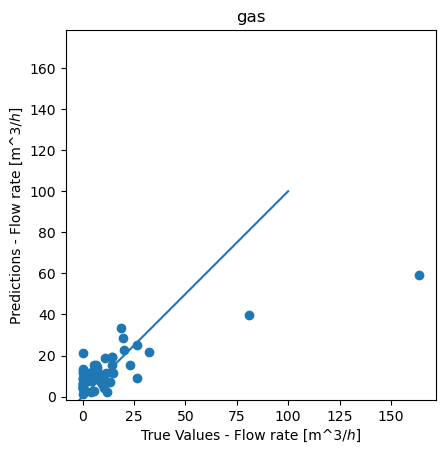

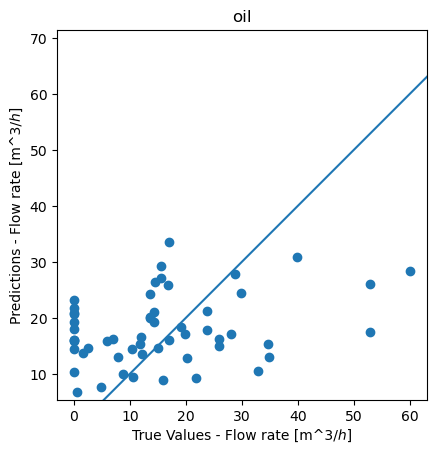

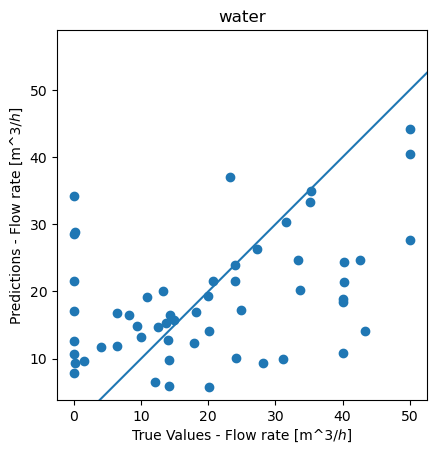

In [128]:
# Run predict
Y_pred = model.predict(final_test_X)
gas_pred = Y_pred[0]
oil_pred = Y_pred[1]
water_pred = Y_pred[2]
plot_diff(final_test_Y[0], Y_pred[0], title='gas')
plot_diff(final_test_Y[1], Y_pred[1], title='oil')
plot_diff(final_test_Y[2], Y_pred[2], title='water')

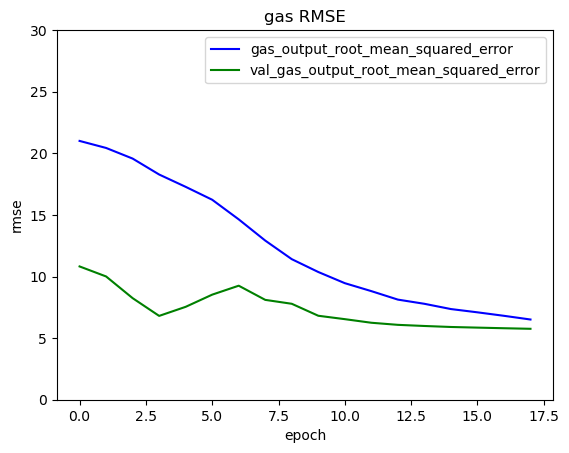

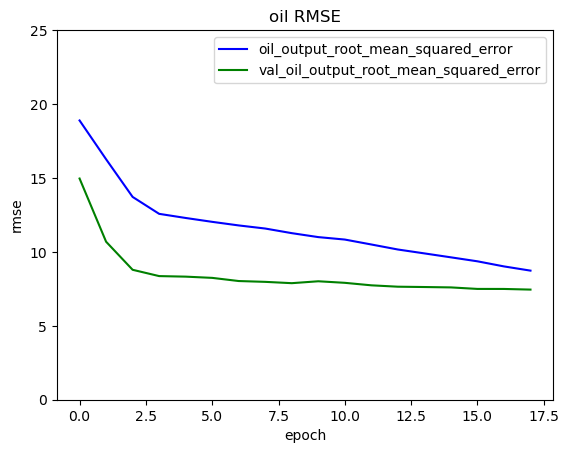

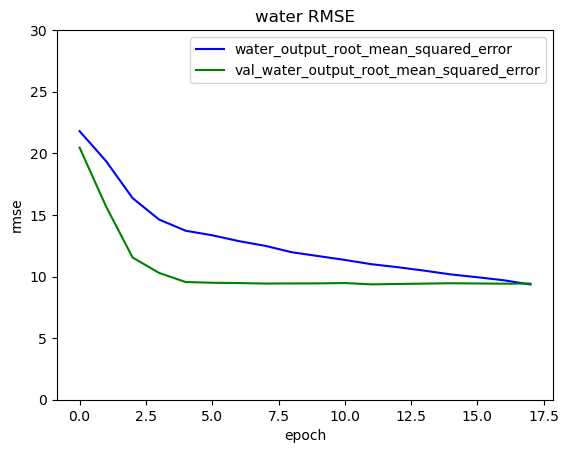

In [131]:
# Plot RMSE
plot_metrics(metric_name='gas_output_root_mean_squared_error', title='gas RMSE', ylim=30)
plot_metrics(metric_name='oil_output_root_mean_squared_error', title='oil RMSE', ylim=25)
plot_metrics(metric_name='water_output_root_mean_squared_error', title='water RMSE', ylim=30)

In [136]:
Y_pred = np.squeeze(Y_pred)

In [137]:
#Create a DataFrame of different parameters
import pandas as pd
pred_df = pd.DataFrame({
                        "gas_true": final_test_Y[0],
                        "gas_preds": Y_pred[0],
                        "oil_true": final_test_Y[1],
                        "oil_preds": Y_pred[1],
                        "water_true": final_test_Y[2],
                        "water_preds": Y_pred[2]})
pred_df

,gas_true,gas_preds,oil_true,oil_preds,water_true,water_preds
0,5.446443,2.888607,7.802234,13.073839,17.811947,12.363946
1,18.490943,33.602818,52.934467,17.492334,35.321300,34.977020
2,26.617914,25.020412,52.801797,26.088575,35.199214,33.350021
3,3.680254,7.455534,13.633987,19.933739,14.163469,5.971782
4,6.709290,15.301392,12.156320,13.462441,12.527703,14.779359
5,11.134832,11.739111,19.923563,17.202654,20.085011,5.809471
6,14.088435,19.180326,15.580381,29.321230,10.894630,19.118530
7,0.155233,3.816822,10.573452,9.435626,1.501769,9.617842
8,4.071209,2.174134,34.800624,12.979780,14.953140,15.740222
9,3.291336,11.612150,14.250283,20.959890,33.346524,24.701723


In [138]:
# Test the model and print loss and rmse for all outputs (test data)
loss, Y1_loss, Y2_loss, Y3_loss, Y1_rmse, Y2_rmse, Y3_rmse = model.evaluate(x=final_test_X, y=final_test_Y)

print()
print(f'loss: {loss}')
print(f'gas_loss: {Y1_loss}')
print(f'oil_loss: {Y2_loss}')
print(f'water_loss: {Y3_loss}')
print(f'gas_rmse: {Y1_rmse}')
print(f'oil_rmse: {Y2_rmse}')
print(f'water_rmse: {Y3_rmse}')

2/2 [==============================] - 0s 8ms/step - loss: 17403940.0000 - gas_output_loss: 15914572.0000 - oil_output_loss: 704177.1875 - water_output_loss: 785190.2500 - gas_output_root_mean_squared_error: 16.8713 - oil_output_root_mean_squared_error: 13.7630 - water_output_root_mean_squared_error: 13.8547

loss: 17403940.0
gas_loss: 15914572.0
oil_loss: 704177.1875
water_loss: 785190.25
gas_rmse: 16.871274948120117
oil_rmse: 13.763047218322754
water_rmse: 13.85469913482666


In [139]:
# Save model
model.save('./model_flow_rate_final_physics_2/', save_format='tf')

INFO:tensorflow:Assets written to: ./model_flow_rate_final_physics_2/assets


In [140]:
# # Restore model
loaded_model = tf.keras.models.load_model('./model_flow_rate_final_physics_2/', custom_objects={'custom_loss': custom_loss})

In [141]:
# Run predict with restored model
predictions = loaded_model.predict(norm_test_X)
gas_pred = predictions[0]
oil_pred = predictions[1]
water_pred = predictions[2]

In [142]:
pred_df.to_csv('predictions_and_true_physics based_2.csv', index=True)

In [143]:
# Test the model and print loss and rmse for all outputs
loss, Y1_loss, Y2_loss, Y3_loss, Y1_rmse, Y2_rmse, Y3_rmse = loaded_model.evaluate(x=final_test_X, y=final_test_Y)

print()
print(f'loss: {loss}')
print(f'gas_loss: {Y1_loss}')
print(f'oil_loss: {Y2_loss}')
print(f'water_loss: {Y3_loss}')
print(f'gas_rmse: {Y1_rmse}')
print(f'oil_rmse: {Y2_rmse}')
print(f'water_rmse: {Y3_rmse}')

2/2 [==============================] - 0s 0s/step - loss: 17403940.0000 - gas_output_loss: 15914572.0000 - oil_output_loss: 704177.1875 - water_output_loss: 785190.2500 - gas_output_root_mean_squared_error: 16.8713 - oil_output_root_mean_squared_error: 13.7630 - water_output_root_mean_squared_error: 13.8547

loss: 17403940.0
gas_loss: 15914572.0
oil_loss: 704177.1875
water_loss: 785190.25
gas_rmse: 16.871274948120117
oil_rmse: 13.763047218322754
water_rmse: 13.85469913482666
